# Lab 5 - Data Visualization

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

In [19]:
week3 = pd.read_csv("nfloffenseweek3.csv")
for row in week3:
    week3["week"] = 3

week4 = pd.read_csv("nfloffenseweek4.csv")
for row in week4:
    week4["week"] = 4

week5 = pd.read_csv("nfloffenseweek5.csv")
for row in week5:
    week5["week"] = 5

all_weeks = pd.concat([week3, week4, week5])

teams = pd.read_csv("nfl_teams.csv")

all_info = all_weeks.merge(teams, left_on="team", right_on="Name", how="left")
all_info



,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week,ID,Name,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,5,42.9,8.6,35.63,3,3.0,Baltimore Ravens,BAL,AFC,North
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,5,40.5,5.4,31.05,3,11.0,Detroit Lions,DET,NFC,North
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,6,46.7,16.7,47.46,3,4.0,Buffalo Bills,BUF,AFC,East
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,8,45.2,6.5,40.73,3,16.0,Kansas City Chiefs,KC,AFC,West
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,6,39.4,3.0,45.06,3,24.0,Philadelphia Eagles,PHI,NFC,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,28,Chicago Bears,5,86,1370,266,5.2,8,4,73,...,9,36.5,13.5,-5.91,5,6.0,Chicago Bears,CHI,NFC,North
92,29,Los Angeles Rams,5,80,1499,312,4.8,12,5,93,...,8,31.4,23.5,-19.19,5,29.0,Los Angeles Rams,LAR,NFC,West
93,30,Pittsburgh Steelers,5,77,1479,306,4.8,9,3,92,...,6,26.3,12.3,-25.01,5,25.0,Pittsburgh Steelers,PIT,AFC,North
94,31,Denver Broncos,5,75,1718,318,5.4,6,3,84,...,8,29.3,10.3,-18.28,5,10.0,Denver Broncos,DEN,AFC,West


## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [20]:
df = pd.read_csv("nfloffenseweek3.csv")
df.head()

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,...,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,...,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,...,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,...,451,6,4.4,26,23,173,6,39.4,3.0,45.06


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 32 artists>

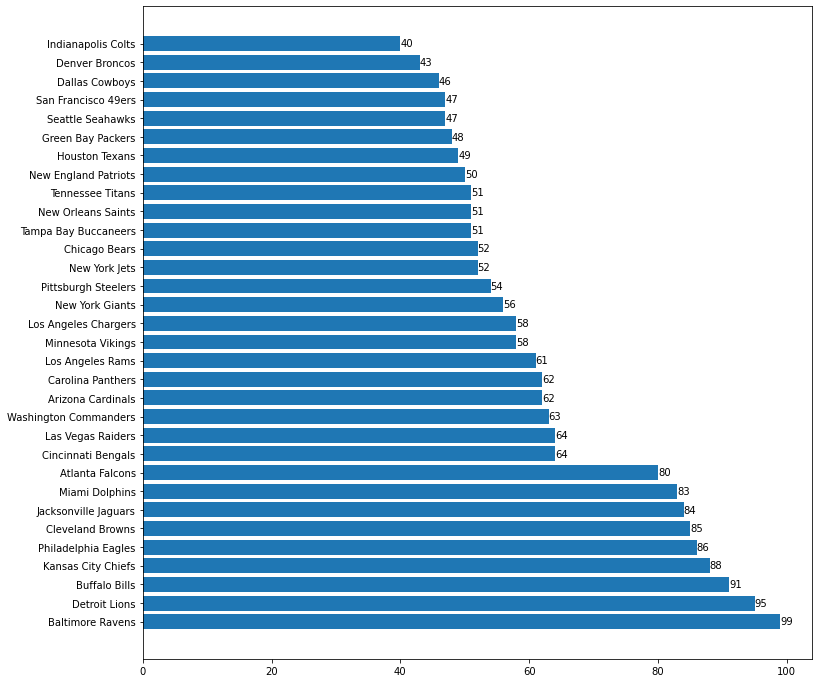

In [21]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df.team, df.points_scored )
plt.bar_label(barhplot, labels = df.points_scored)
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

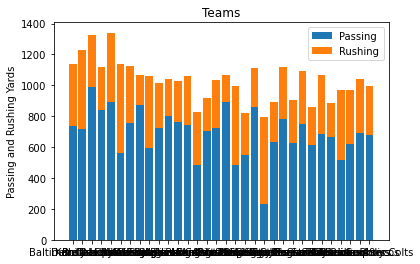

<Figure size 432x144 with 0 Axes>

In [22]:
fig, ax = plt.subplots()
plt.figure(figsize=(6, 2))
ax.bar(df.team, df.passing_yards, label='Passing')
ax.bar(df.team, df.rushing_yards, bottom=df.passing_yards,
       label='Rushing')

ax.set_ylabel('Passing and Rushing Yards')
ax.set_title('Teams')
ax.legend()


4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

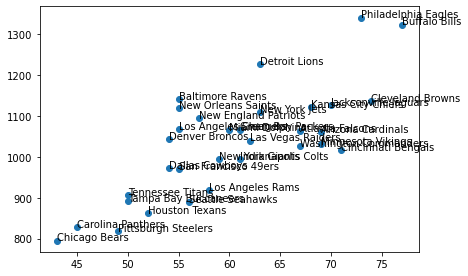

In [23]:
fig, ax = plt.subplots()
plt.tight_layout()
ax.scatter(df["1st_downs"], df.total_yards)
for i, txt in enumerate(df.team):
    ax.annotate(txt, (df["1st_downs"][i], df.total_yards[i]))

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0, 0.5, 'Penalty Yards')

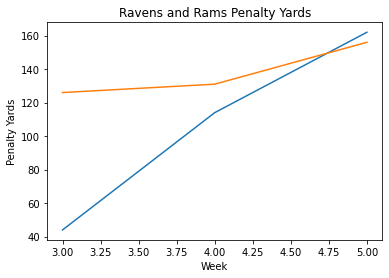

In [24]:

ravens = all_weeks[all_weeks.team == "Baltimore Ravens"]
rams = all_weeks[all_weeks.team == "Los Angeles Rams"]

plt.plot(ravens.week, ravens.penalty_yards)
plt.plot(rams.week, rams.penalty_yards)
plt.title('Ravens and Rams Penalty Yards')
plt.xlabel('Week')
plt.ylabel('Penalty Yards')


6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

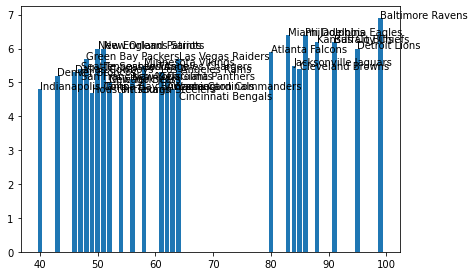

In [25]:
fig, ax = plt.subplots()
plt.tight_layout()
ax.bar(df.points_scored, df.yards_per_play)
for i, txt in enumerate(df.team):
    ax.annotate(txt, (df.points_scored[i], df.yards_per_play[i]))

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0, 0.5, 'Penalty Yards')

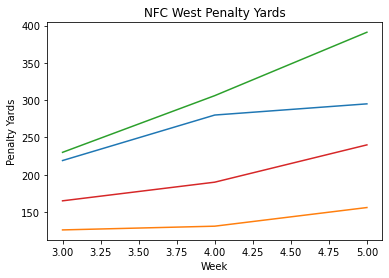

In [26]:
nfc = all_info[all_info.Conference == "NFC"]
nfcw = nfc[nfc.Division == "West"]
nfcw = nfcw.sort_values(by = 'week')

nfcw_card = nfcw[nfcw.team =="Arizona Cardinals"]
nfcw_ram = nfcw[nfcw.team =="Los Angeles Rams"]
nfcw_sea = nfcw[nfcw.team =="Seattle Seahawks"]
nfcw_49 = nfcw[nfcw.team =="San Francisco 49ers"]

plt.plot(nfcw_card.week, nfcw_card.penalty_yards)
plt.plot(nfcw_ram.week, nfcw_ram.penalty_yards)
plt.plot(nfcw_sea.week, nfcw_sea.penalty_yards)
plt.plot(nfcw_49.week, nfcw_49.penalty_yards)
plt.title('NFC West Penalty Yards')
plt.xlabel('Week')
plt.ylabel('Penalty Yards')

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)